<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/4thWeek/Tugas_ML_4_Compas_Scores_2_Years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/smt akhir/ml/compas-scores-two-years.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [ ]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [ ]:
# Hapus kolom identitas, duplikat, dan kosong
drop_columns = [
    'id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out',
    'c_case_number', 'c_offense_date', 'c_arrest_date', 'r_case_number', 'r_charge_degree',
    'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number', 'vr_charge_degree',
    'vr_offense_date', 'vr_charge_desc', 'screening_date', 'v_screening_date',
    'violent_recid', 'decile_score.1', 'priors_count.1', 'in_custody', 'out_custody',
    'start', 'end', 'event', 'v_type_of_assessment', 'type_of_assessment'
]
df.drop(columns=drop_columns, inplace=True)

In [ ]:
# Target variable
target = 'two_year_recid'

# Isi missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

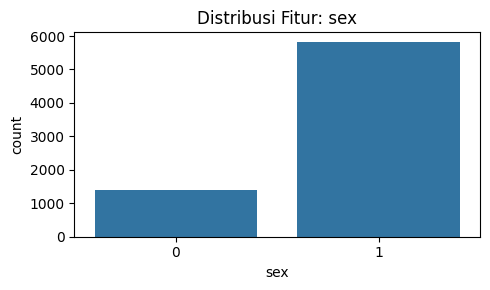

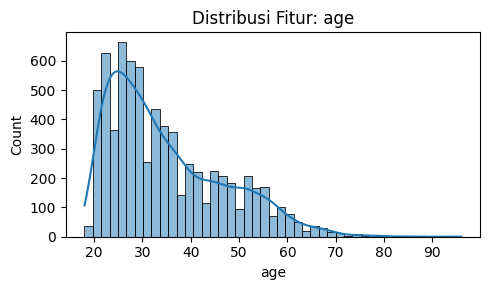

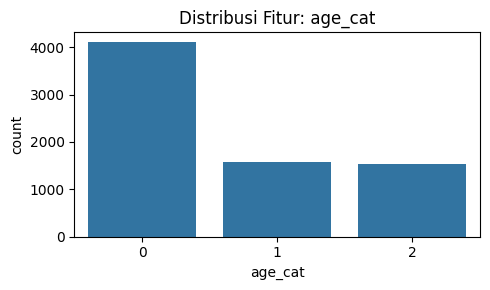

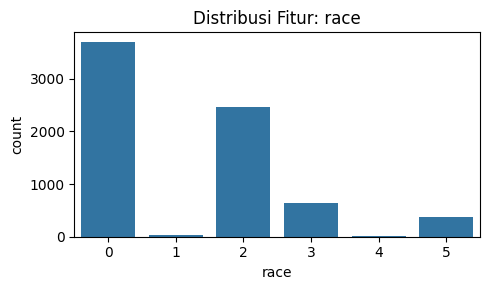

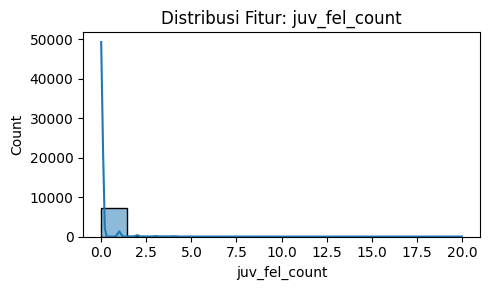

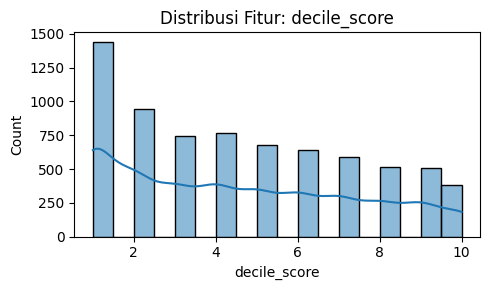

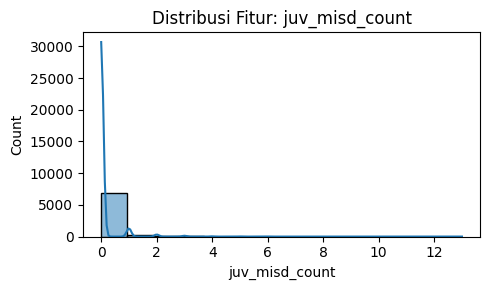

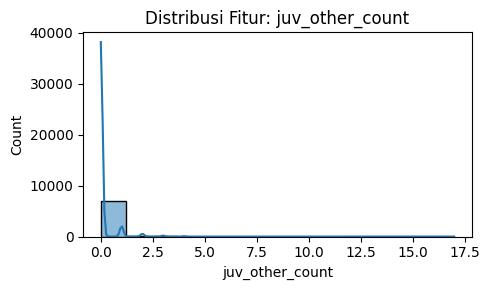

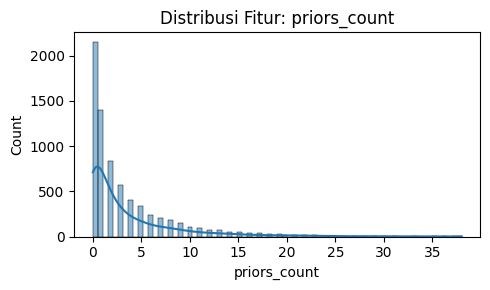

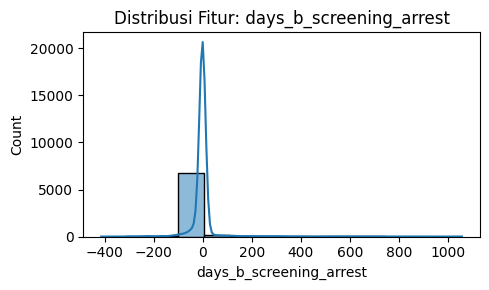

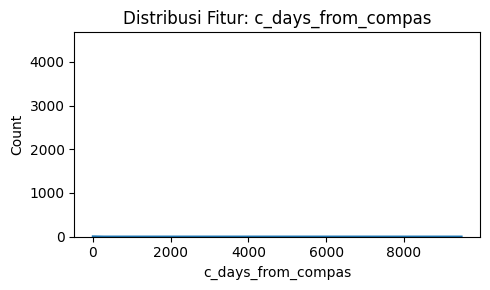

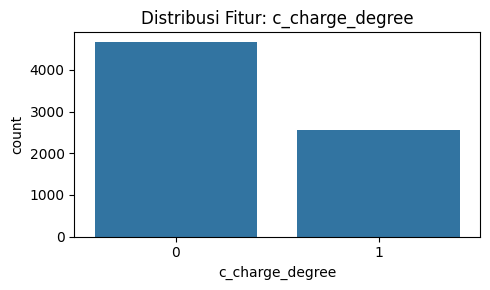

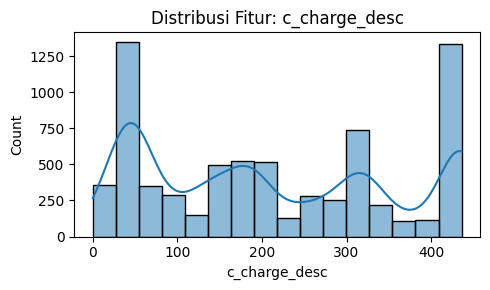

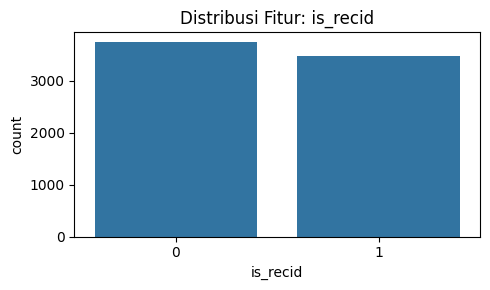

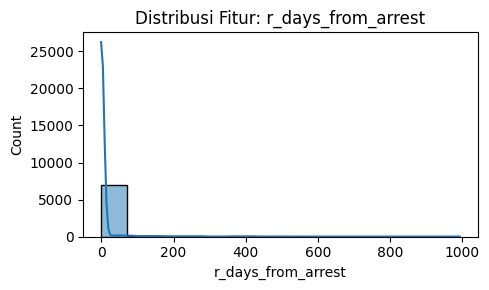

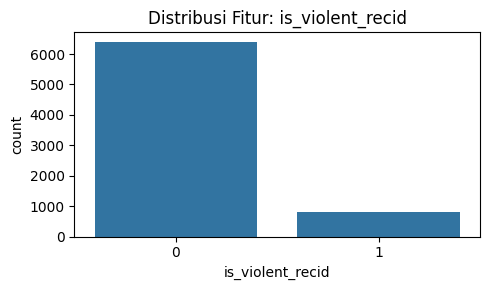

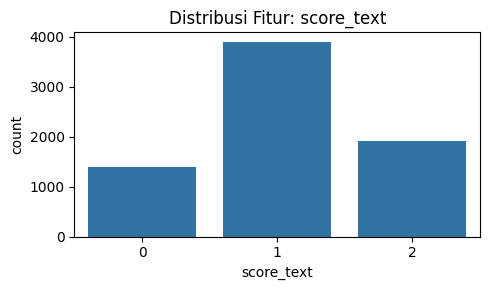

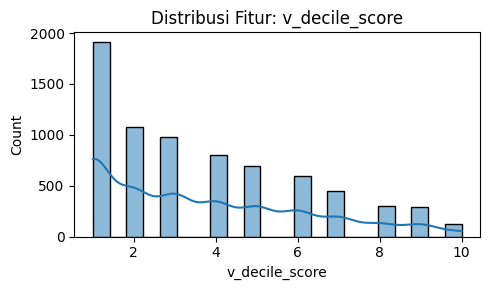

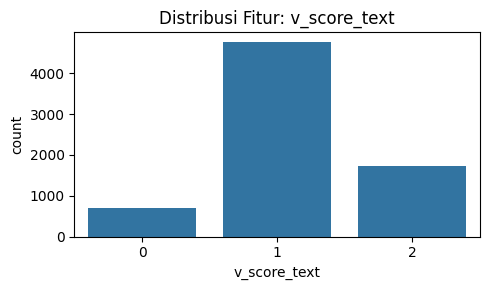

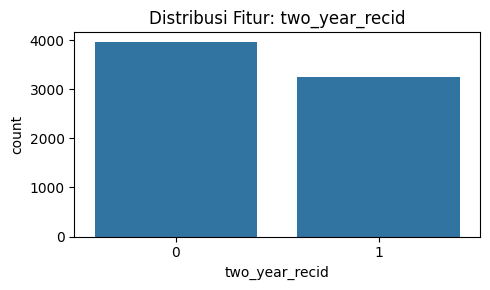

In [ ]:
# Encoding fitur kategorikal
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# EDA & Visualisasi semua fitur
for col in df.columns:
    plt.figure(figsize=(5, 3))
    if df[col].nunique() < 10:
        sns.countplot(x=col, data=df)
    else:
        sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Fitur: {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      7214 non-null   int64  
 1   age                      7214 non-null   int64  
 2   age_cat                  7214 non-null   int64  
 3   race                     7214 non-null   int64  
 4   juv_fel_count            7214 non-null   int64  
 5   decile_score             7214 non-null   int64  
 6   juv_misd_count           7214 non-null   int64  
 7   juv_other_count          7214 non-null   int64  
 8   priors_count             7214 non-null   int64  
 9   days_b_screening_arrest  7214 non-null   float64
 10  c_days_from_compas       7214 non-null   float64
 11  c_charge_degree          7214 non-null   int64  
 12  c_charge_desc            7214 non-null   int64  
 13  is_recid                 7214 non-null   int64  
 14  r_days_from_arrest      

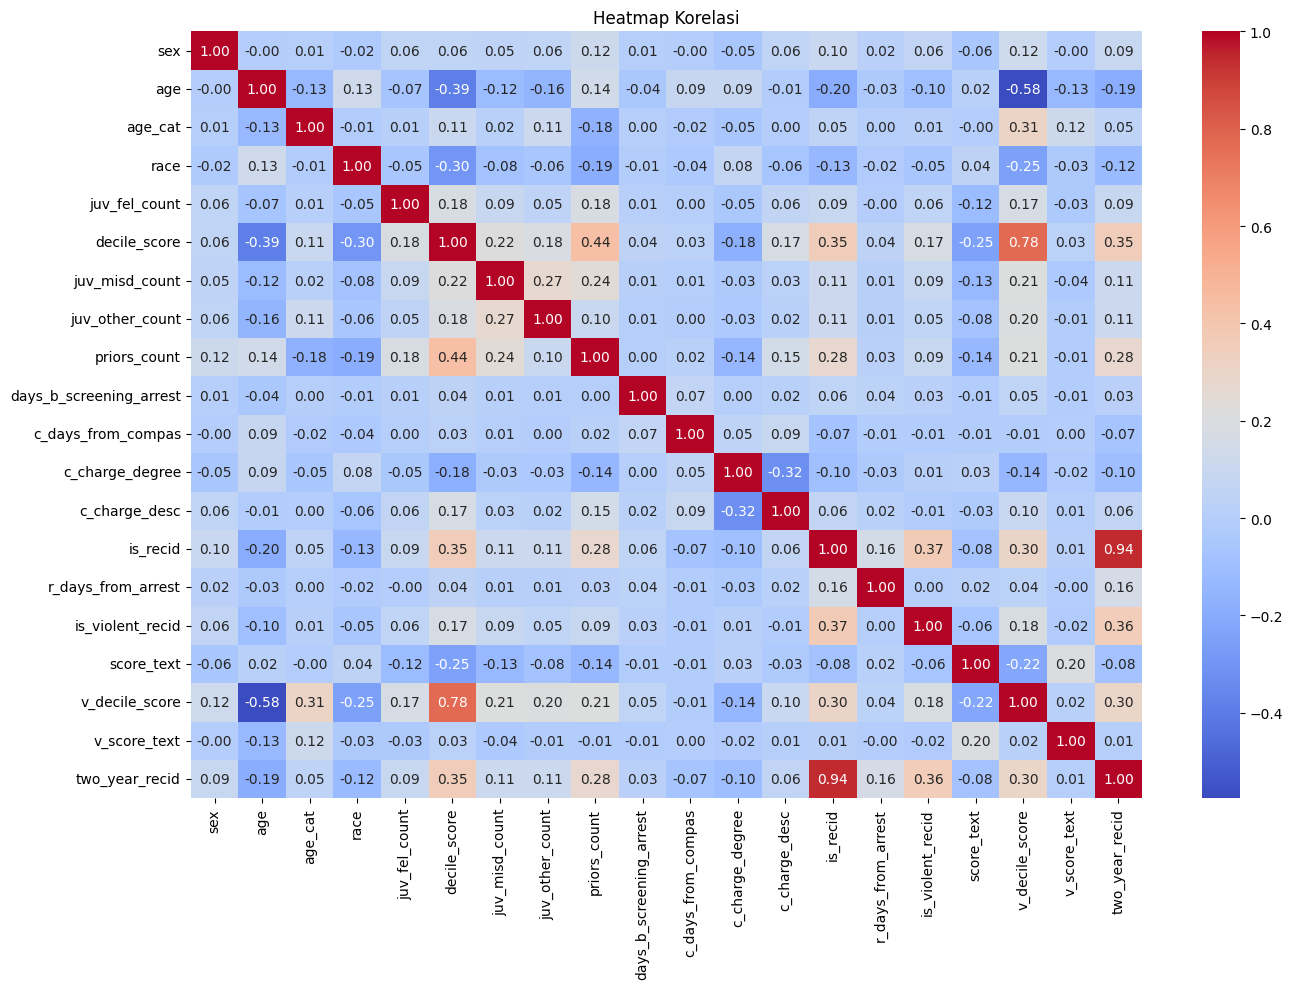

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

In [ ]:
# Pemisahan fitur dan target
X = df.drop(columns=target)
y = df[target]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modeling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Matriks Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Cetak hasil evaluasi
print("=== EVALUASI MODEL ===")
print(f"Akurasi     : {acc:.3f}")
print(f"Presisi     : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1 Score    : {f1:.3f}")
print(f"AUC         : {auc:.3f}")

=== EVALUASI MODEL ===
Akurasi     : 0.976
Presisi     : 0.951
Recall      : 0.995
F1 Score    : 0.972
AUC         : 0.982


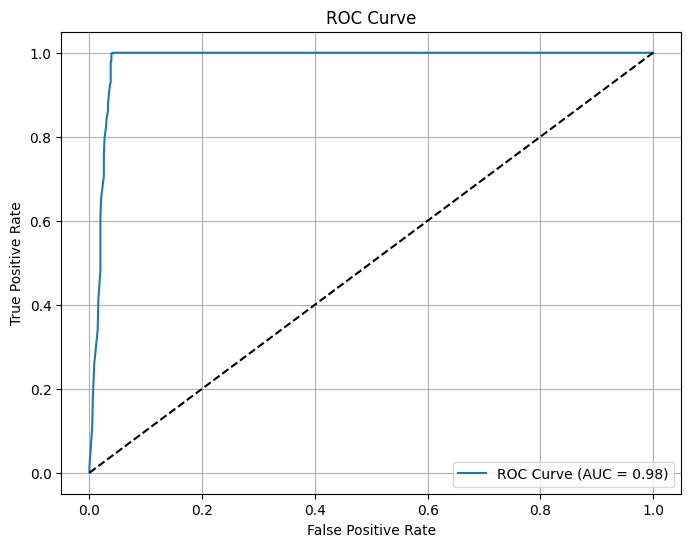

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Accuracy = (TP + TN) / (TP + TN + FP + FN)

→ Mengukur seberapa banyak prediksi benar dari total prediksi.


Precision = TP / (TP + FP)

→ Mengukur berapa banyak dari prediksi positif yang benar-benar positif.


Recall = TP / (TP + FN)

→ Mengukur seberapa banyak kasus positif yang berhasil ditemukan model.


F1 = 2 * (Precision * Recall) / (Precision + Recall)

→ Kombinasi harmonis antara Precision dan Recall. Cocok untuk data tidak seimbang.


AUC = luas di bawah kurva ROC

→ Mengukur kemampuan model membedakan kelas positif dan negatif.
→ AUC = 1 berarti sempurna, AUC = 0.5 berarti seperti tebak-tebakan acak.
